In [1]:
import numpy as np
import numpy.random as rnd

In [2]:
rnd.seed(4)
m = 60 # No of instances
w1, w2 = 0.1, 0.3
noise = 0.1

angles = rnd.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * rnd.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * rnd.randn(m)

# mean-normalize the data
X = X - X.mean(axis=0)

# apply PCA -(projection-based dimension reduction technique) to reduce to 2D
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #n_components denote the number of axes the dataset has to be reduced to
X2D = pca.fit_transform(X)

# recover 3D points projected on 2D plane
X2D_inv = pca.inverse_transform(X2D)

In [3]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

# express plane as function of x,y
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

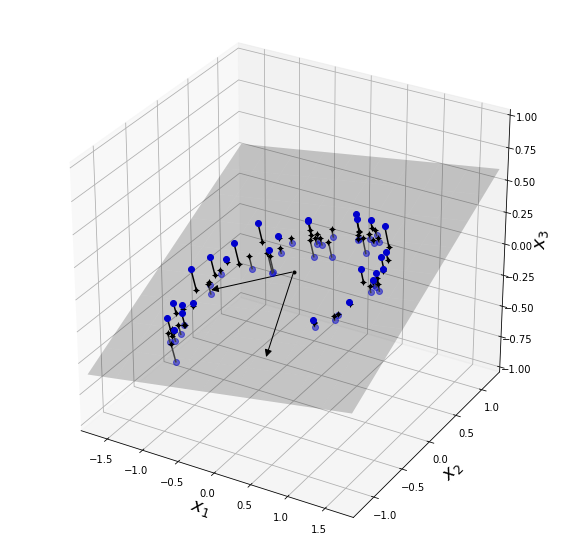

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X2D_inv[:, 2]] # ones above the identified plane
X3D_below = X[X[:, 2] <= X2D_inv[:, 2]] # ones below the identified plane

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5) # plotting the ones below the identified plane

ax.plot_surface(x1, x2, z, alpha=0.2, color="k") # plotting the identified plane
np.linalg.norm(C, axis=0)

# plotting the projection arrows
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X2D_inv[i, 2]:
        ax.plot([X[i][0], X2D_inv[i][0]], [X[i][1], X2D_inv[i][1]], [X[i][2], X2D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X2D_inv[i][0]], [X[i][1], X2D_inv[i][1]], [X[i][2], X2D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X2D_inv[:, 0], X2D_inv[:, 1], X2D_inv[:, 2], "k+") # Plotting the projections
ax.plot(X2D_inv[:, 0], X2D_inv[:, 1], X2D_inv[:, 2], "k.") # Plotting the projections
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo") # Plotting the instances above the identified plane
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

#save_fig("dataset_3d_plot")
plt.show()

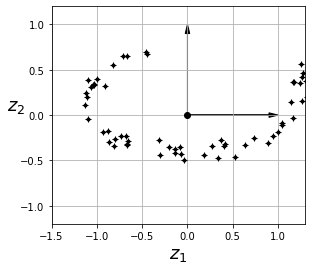

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "k+") # plotting the projections
ax.plot(X2D[:, 0], X2D[:, 1], "k.") # plotting the projections
ax.plot([0], [0], "ko") # Plotting the origin
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k') # plotting the z1 arrow 
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k') # plotting the z2 arrow
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
plt.show()

In [6]:
from sklearn.datasets import make_swiss_roll
help(make_swiss_roll)

Help on function make_swiss_roll in module sklearn.datasets._samples_generator:

make_swiss_roll(n_samples=100, noise=0.0, random_state=None)
    Generate a swiss roll dataset.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The number of sample points on the S curve.
    
    noise : float, optional (default=0.0)
        The standard deviation of the gaussian noise.
    
    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.
    
    Returns
    -------
    X : array of shape [n_samples, 3]
        The points.
    
    t : array of shape [n_samples]
        The univariate position of the sample according to the main dimension
        of the points in the manifold.
    
    Notes
    -----
  

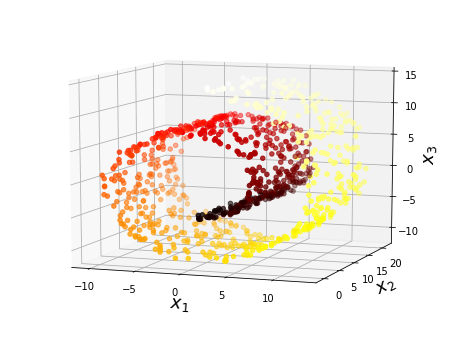

In [7]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# cmap chooses the color map
# color of the indexes are set based on the univariate position of the instance
# a univariate position based on the main axis (which is along the swiss roll plane)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

In [8]:
print(X[0:5,:])
print(t[0:5])

[[-3.29677117  4.26198454  7.69787682]
 [ 5.95972743 11.45784273 12.72625276]
 [ 6.66051523 18.15820401 -9.84713337]
 [-6.11824123 15.48364843 -8.30589399]
 [ 6.33443886 16.41063456 -0.4913301 ]]
[ 8.24234644 13.67266022 11.61126935 10.35461227  6.18283002]


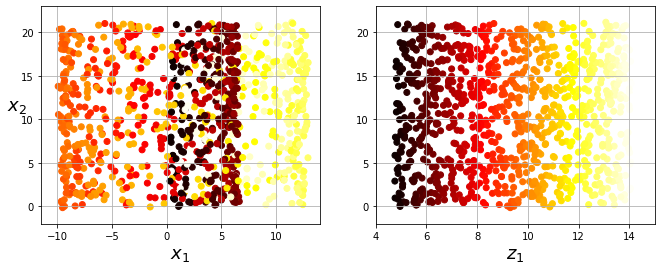

In [9]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

# Plotting x2 versus the univariate label
# hence, the coloring is linear in the second curve and changes with the univariate label
plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

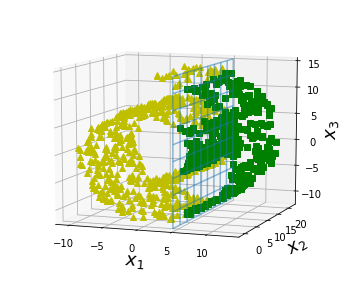

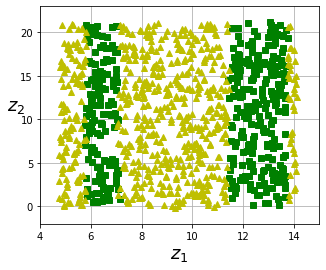

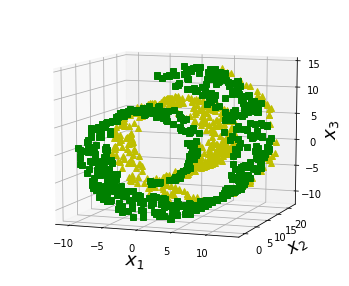

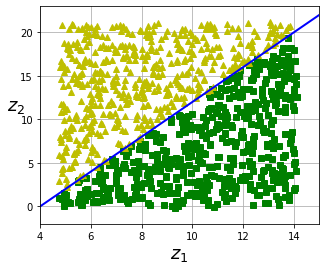

In [10]:
from matplotlib import gridspec

# Plotting the axes
axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

# X contains the make_swiss_swiss roll data
# Defining Case 1
positive_class = X[:, 0] > 5 # Potive class x1 > 5 for case 1
X_pos = X[positive_class]
X_neg = X[~positive_class]

# Plotting Case 1
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

# Plotting x2 versus t (univariate variable along the rolled plane)
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
plt.plot(t[positive_class], X[positive_class, 1], "gs") # plotting the positive class
plt.plot(t[~positive_class], X[~positive_class, 1], "y^") # plotting the negative class
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# defining case 2 where the decision boundary is a function of the univariate vvariable t
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')
positive_class = 2 * (t[:] - 4) > X[:, 1] # defining the postive class as a function of univariate variable t
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^") # plotting the positive class
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs") # plotting the negative class
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

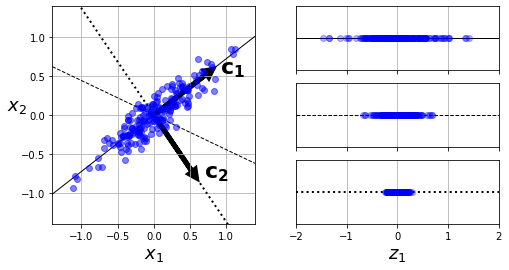

In [11]:
angle = np.pi / 5 # defining an angle of 36 degrees
stretch = 5
m = 200

rnd.seed(3)
X = rnd.randn(m, 2) / 10 # Generating 200 * 2 normalized random numbers in the range and strething it 5 times along the x axis
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretching by multpliying thr x1 axis by 5 times
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # projection along 36 degrees and 54 degrees

u1 = np.array([np.cos(angle), np.sin(angle)]) # array to rotate a an array by 36 degrees
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)]) # array to rotate an array by -24 degrees
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)]) # array to rotate an array by -54 degrees

X_proj1 = X.dot(u1.reshape(-1, 1)) # projection along 36 degrees angle
X_proj2 = X.dot(u2.reshape(-1, 1)) # projection along -24 degrees angle
X_proj3 = X.dot(u3.reshape(-1, 1)) # projection along -54 degrees angle

# Plotting the dataset, the hyperplanes, 
plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1) # plotting hyper plane 1
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1) # plotting hyper plane 2
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2) # plotting hyper plane 3
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5) # Plotting the datasets
plt.axis([-1.4, 1.4, -1.4, 1.4]) # Making the axis
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k') # plotting the unit vector along first hyperplane
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k') # plotting the unit vector along third hyperplane
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

# PLotting the projections along the hyperplanes 
## Projection 1
plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

## Projection 2
plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

## Projection 3
plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

In [12]:
X_centered = X - X.mean(axis=0)
U,s,V = np.linalg.svd(X_centered)

# Extracting the first 2 components
c1, c2 = V.T[:,0], V.T[:,1]
print(c1)
print(c2)

[-0.79644131 -0.60471583]
[-0.60471583  0.79644131]


In [13]:
import numpy as np
u = np.array([2,5])
v = np.array([3, 1])

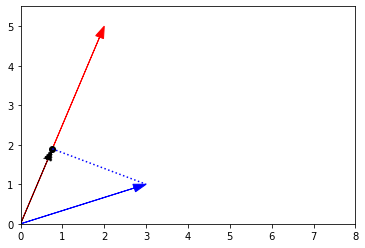

In [14]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)



import numpy.linalg as LA
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

# plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
# plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
# plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
# plt.grid()
plt.show()

In [15]:
W2 = V.T[:, :2]
X2D = X_centered.dot(W2)
print(X2D)

[[-8.96088137e-01  2.61576283e-02]
 [-4.53603363e-02 -1.85948860e-01]
 [ 1.38359166e-01 -3.11666166e-02]
 [ 4.16315780e-02 -6.04371773e-02]
 [ 2.18583744e-02 -4.58726693e-02]
 [ 6.53868464e-01  1.03673047e-01]
 [-4.45218566e-01  1.63002740e-01]
 [-2.52100754e-02 -3.96098381e-02]
 [ 2.74828447e-01 -1.47486328e-01]
 [-4.89804685e-01 -1.19064333e-01]
 [ 5.91772943e-01 -6.68825324e-03]
 [-7.44460369e-01  9.37220434e-03]
 [ 5.12230114e-01 -5.91117152e-02]
 [-3.13266691e-01 -2.12641588e-02]
 [ 3.83765553e-01 -1.35145070e-02]
 [-3.77664930e-01  1.91087392e-01]
 [ 6.22192127e-01 -4.81326634e-02]
 [ 4.05843018e-01 -2.32002753e-01]
 [ 4.62900292e-01 -9.12474313e-02]
 [-5.62638042e-01 -2.36637544e-02]
 [ 8.09046208e-01  8.31463215e-02]
 [ 1.80719622e-01 -1.69142171e-01]
 [ 2.98447518e-01 -5.11785151e-02]
 [ 4.35729072e-01  1.35618235e-02]
 [ 1.12339132e+00 -1.68707469e-03]
 [-5.09329756e-01  7.59538223e-02]
 [-5.57383436e-01  1.01605408e-01]
 [-7.42300017e-01 -1.26114063e-01]
 [-4.19950471e-01 -1

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

print(pca.components_[0])
print(pca.components_.T[:,0])

[-0.79644131 -0.60471583]
[-0.79644131 -0.60471583]


In [17]:
print(pca.explained_variance_ratio_)

[0.95369864 0.04630136]


In [18]:
cs = np.cumsum([1,2,3,4,5])
print(cs)

[ 1  3  6 10 15]


In [19]:
np.argmax(cs > 5)

2

In [20]:
pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

[0.95369864 0.04630136]
[0.95369864 1.        ]
1


In [21]:
np.argmax(cumsum >= 0.95)

0

In [22]:
from sklearn.model_selection import train_test_split
#from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml

#mnist = fetch_mldata('MNIST original')
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)

X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

X = X_train

pca = PCA()
pca.fit(X)
d = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
d

154

In [23]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
pca.n_components_

154

In [24]:
np.sum(pca.explained_variance_ratio_)

0.9504334914295708

In [25]:
X_mnist = X_train

pca = PCA(n_components = 154)
X_mnist_reduced = pca.fit_transform(X_mnist)
X_mnist_recovered = pca.inverse_transform(X_mnist_reduced)

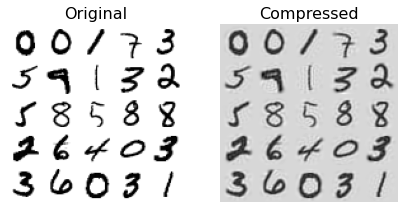

In [26]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_mnist[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_mnist_recovered[::2100])
plt.title("Compressed", fontsize=16)
#save_fig("mnist_compression_plot")
plt.show()